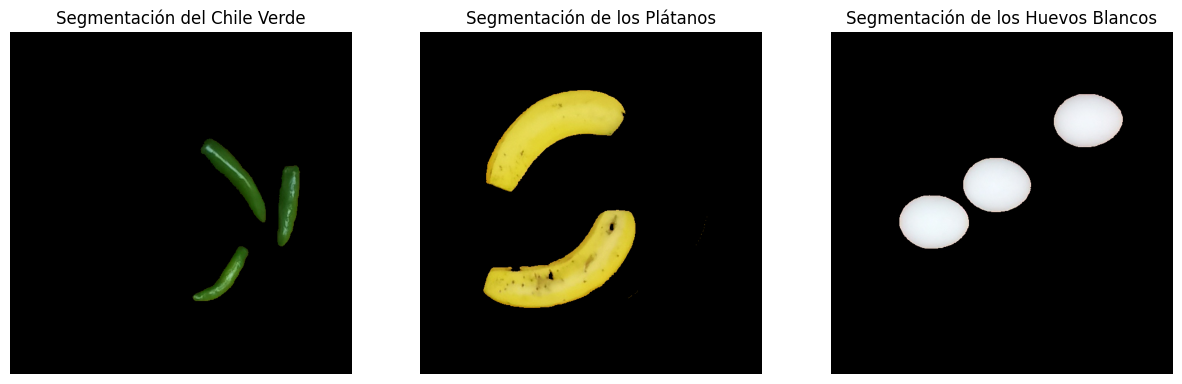

Media del Chile Verde: [ 50.05129466 190.70804654  94.62389381]
Covarianza del Chile Verde:
 [[  32.09816353 -165.11376195   67.56399594]
 [-165.11376195 1748.92163975 -991.21052744]
 [  67.56399594 -991.21052744  845.77461875]]
Media de los Plátanos: [ 26.37452444 183.73125451 216.26125692]
Covarianza de los Plátanos:
 [[   2.08366796  -11.16578614   12.71871246]
 [ -11.16578614  483.34271308 -165.79270176]
 [  12.71871246 -165.79270176  214.41872818]]
Media de los Huevos Blancos: [ 96.49896714   9.59094836 236.93126761]
Covarianza de los Huevos Blancos:
 [[1324.62748729 -114.58059454  107.18953237]
 [-114.58059454   45.03267798    4.14007796]
 [ 107.18953237    4.14007796  124.14837063]]


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen desde el archivo
imagen_original = cv2.imread('chile.jpg')

# Convertir la imagen al espacio de color HSV
imagen_hsv = cv2.cvtColor(imagen_original, cv2.COLOR_BGR2HSV)

# Segmentación del chile verde
rango_minimo_chile = np.array([35, 50, 50])  # límite inferior del chile verde
rango_maximo_chile = np.array([85, 255, 255])  # límite superior del chile verde
mascara_chile = cv2.inRange(imagen_hsv, rango_minimo_chile, rango_maximo_chile)
imagen_segmentada_chile = cv2.bitwise_and(imagen_original, imagen_original, mask=mascara_chile)

# Segmentación de los plátanos (amarillos)
rango_minimo_platanos = np.array([20, 100, 100])  # límite inferior del plátano
rango_maximo_platanos = np.array([30, 255, 255])  # límite superior del plátano
mascara_platanos = cv2.inRange(imagen_hsv, rango_minimo_platanos, rango_maximo_platanos)
imagen_segmentada_platanos = cv2.bitwise_and(imagen_original, imagen_original, mask=mascara_platanos)

# Segmentación de los huevos blancos
rango_minimo_huevos = np.array([0, 0, 200])  # límite inferior para blanco
rango_maximo_huevos = np.array([180, 50, 255])  # límite superior para blanco
mascara_huevos = cv2.inRange(imagen_hsv, rango_minimo_huevos, rango_maximo_huevos)
imagen_segmentada_huevos = cv2.bitwise_and(imagen_original, imagen_original, mask=mascara_huevos)

# Convertir las imágenes segmentadas a RGB para visualización con Matplotlib
imagen_rgb_chile = cv2.cvtColor(imagen_segmentada_chile, cv2.COLOR_BGR2RGB)
imagen_rgb_platanos = cv2.cvtColor(imagen_segmentada_platanos, cv2.COLOR_BGR2RGB)
imagen_rgb_huevos = cv2.cvtColor(imagen_segmentada_huevos, cv2.COLOR_BGR2RGB)

# Mostrar las imágenes segmentadas
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(imagen_rgb_chile)
axs[0].set_title('Segmentación del Chile Verde')
axs[0].axis('off')

axs[1].imshow(imagen_rgb_platanos)
axs[1].set_title('Segmentación de los Plátanos')
axs[1].axis('off')

axs[2].imshow(imagen_rgb_huevos)
axs[2].set_title('Segmentación de los Huevos Blancos')
axs[2].axis('off')

plt.show()

# Calcular las estadísticas de los objetos segmentados

# Chile verde
pixeles_chile = imagen_hsv[mascara_chile > 0]
media_chile = np.mean(pixeles_chile, axis=0)
covarianza_chile = np.cov(pixeles_chile.T)
print("Media del Chile Verde:", media_chile)
print("Covarianza del Chile Verde:\n", covarianza_chile)

# Plátanos
pixeles_platanos = imagen_hsv[mascara_platanos > 0]
media_platanos = np.mean(pixeles_platanos, axis=0)
covarianza_platanos = np.cov(pixeles_platanos.T)
print("Media de los Plátanos:", media_platanos)
print("Covarianza de los Plátanos:\n", covarianza_platanos)

# Huevos blancos
pixeles_huevos = imagen_hsv[mascara_huevos > 0]
media_huevos = np.mean(pixeles_huevos, axis=0)
covarianza_huevos = np.cov(pixeles_huevos.T)
print("Media de los Huevos Blancos:", media_huevos)
print("Covarianza de los Huevos Blancos:\n", covarianza_huevos)
